In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import math
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style="darkgrid")

In [2]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
from sklearn.model_selection import train_test_split

data = data.drop(columns=["Id"])

y = data["SalePrice"]
X = data.drop(columns=["SalePrice"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

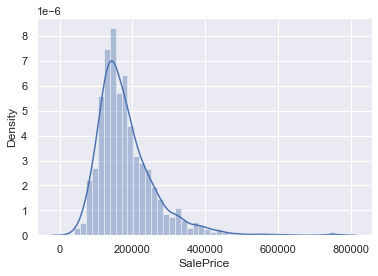

In [6]:
sns.distplot(y_train)

In [7]:
# Обучите линейную регрессию (LinearRegression, Ridge, Lasso) на числовых признаках из нашего датасета

from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [8]:
number = list(X_train.dtypes[X_train.dtypes == "float64"].index)
int_list = list(X_train.dtypes[X_train.dtypes == "int64"].index)
number = number + int_list

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [9]:
lin_regr = LinearRegression().fit(X_train[number], y_train)
ridge_regr = Ridge().fit(X_train[number], y_train)
las_regr = Lasso().fit(X_train[number], y_train)

$$\text{RMSE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} (y_i - a(x_i))^2}$$

In [10]:
# Определите RMSE через функцию sklearn.metrics.make_scorer

from sklearn.metrics import make_scorer

def rmse(true, predictions):
    return math.sqrt(np.square(np.subtract(true,predictions)).mean())

loss_rmse  = make_scorer(rmse, greater_is_better=False)
score_rmse = make_scorer(rmse, greater_is_better=True)

In [11]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

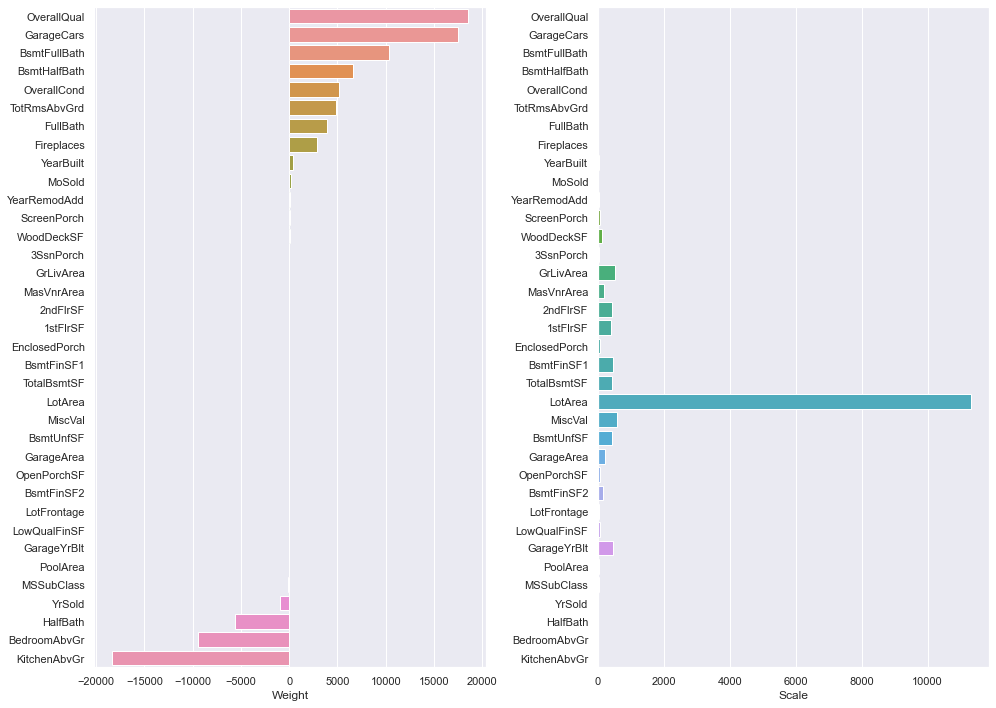

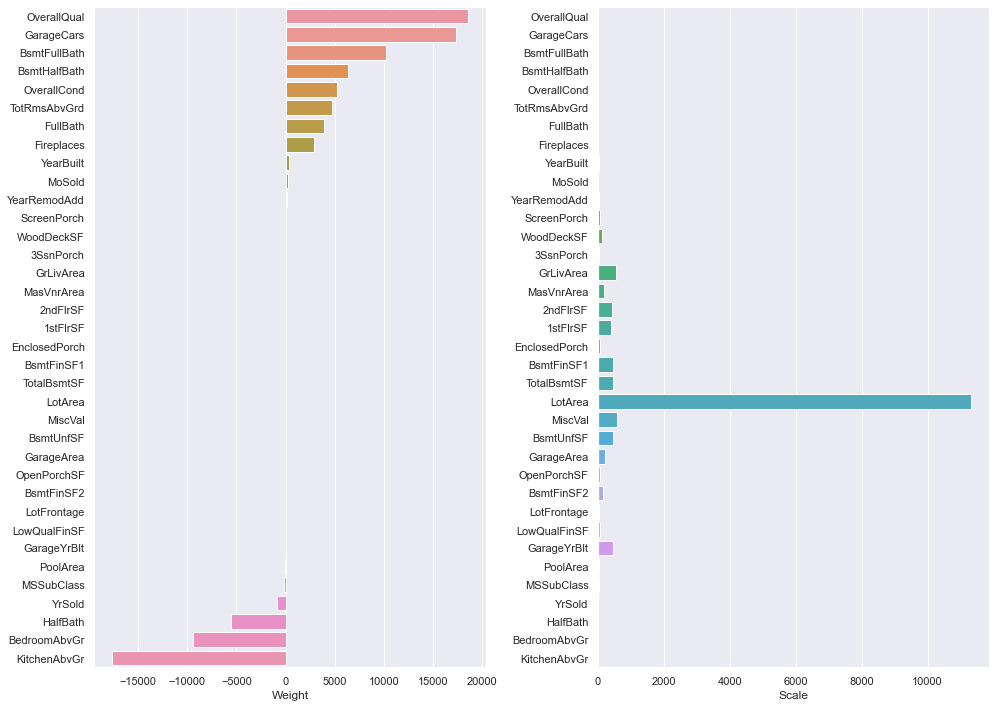

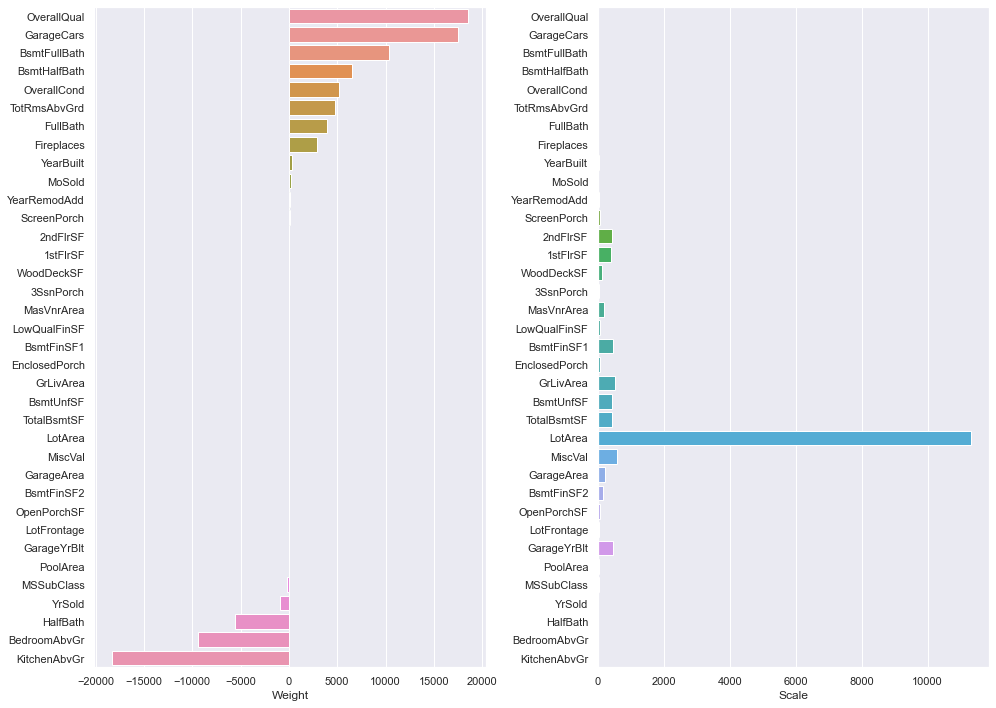

In [12]:
show_weights(number, lin_regr.coef_, X_train[number].std())
show_weights(number, ridge_regr.coef_, X_train[number].std())
show_weights(number, las_regr.coef_, X_train[number].std())

In [13]:
# Отмасштабируйте признаки перед обучением модели, воспользуясь трансформером StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[number])
X_train[number] = scaler.transform(X_train[number])

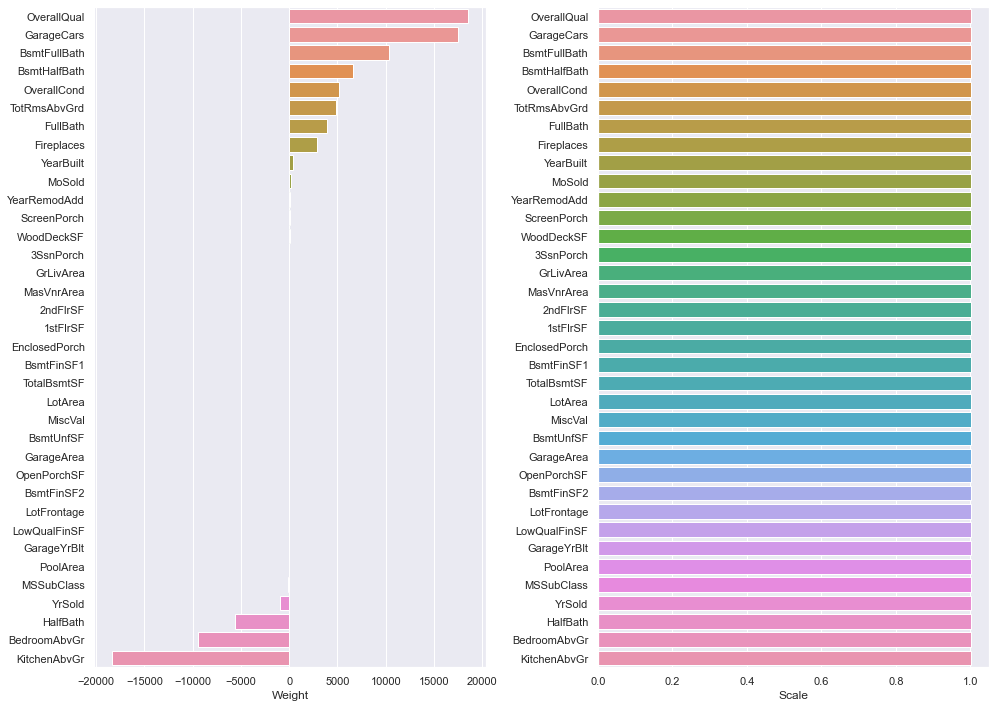

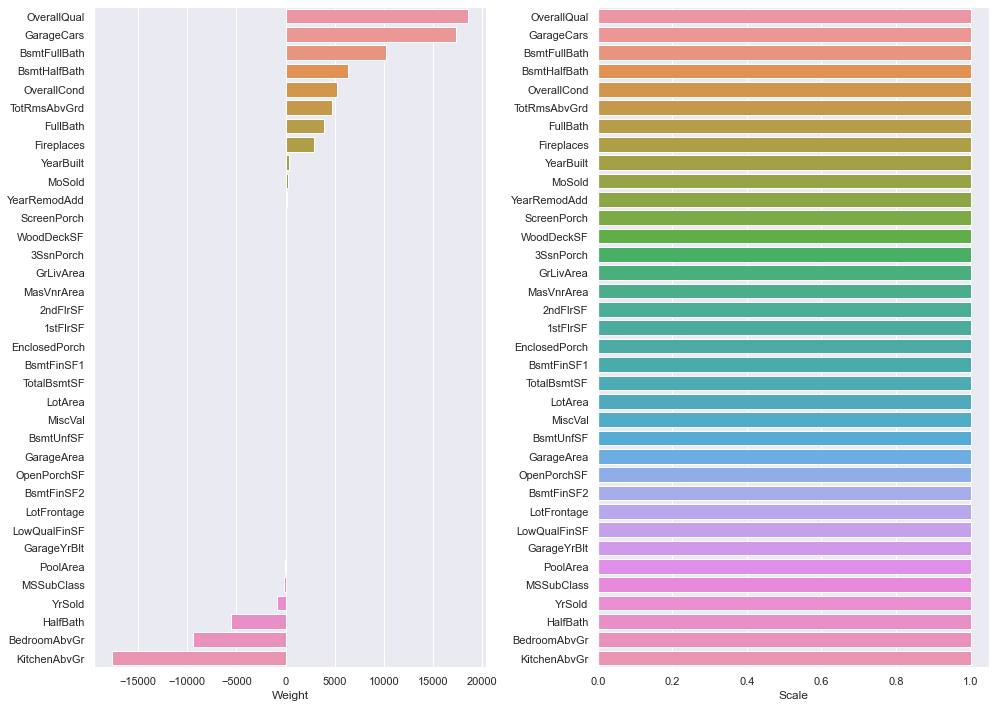

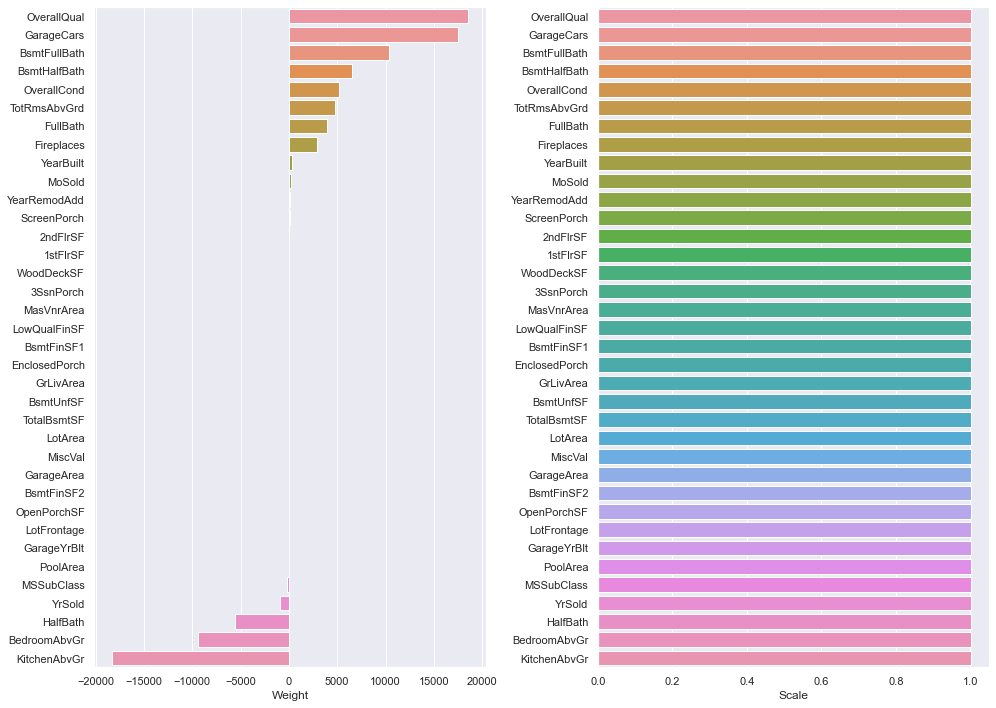

In [14]:
scales = pd.Series(data=X_train[number].std(axis=0), index=number)
show_weights(number, lin_regr.coef_, scales)
show_weights(number, ridge_regr.coef_, scales)
show_weights(number, las_regr.coef_, scales)

In [15]:
# Подберите коэффициент регуляризации alpha, воспользуясь GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

gbr_grid_search = GridSearchCV(cv = 5, estimator= Lasso(), 
                               param_grid = [{'alpha': [0, 0.0001, 0.001, 0.1, 0.5, 1, 10,100]}],
                               #error_score = loss_rmse
                               scoring = make_scorer(r2_score))
gbr_grid_search.fit(X_train[number], y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid=[{'alpha': [0, 0.0001, 0.001, 0.1, 0.5, 1, 10, 100]}],
             scoring=make_scorer(r2_score))

In [16]:
print(gbr_grid_search.best_params_)
print(gbr_grid_search.best_score_)
print(gbr_grid_search.best_estimator_)

{'alpha': 100}
0.7215344204015662
Lasso(alpha=100)


In [17]:
gbr_grid_search = GridSearchCV(cv = 5, estimator= Ridge(), 
                               param_grid = [{'alpha': [0, 0.0001, 0.001, 0.1, 0.5, 1, 10,100]}],
                               scoring = make_scorer(r2_score))
gbr_grid_search.fit(X_train[number], y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [0, 0.0001, 0.001, 0.1, 0.5, 1, 10, 100]}],
             scoring=make_scorer(r2_score))

In [18]:
print(gbr_grid_search.best_params_)
print(gbr_grid_search.best_score_)
print(gbr_grid_search.best_estimator_)

{'alpha': 100}
0.7311134527221513
Ridge(alpha=100)


In [19]:
# Обучите линейную регрессию (LinearRegression, Ridge, Lasso) с подобранным коэффициентом регуляризации на числовых признаках из нашего датасета, воспользуясь классом Pipeline (не забывать про мастабирование признаков через StandardScaler)

from sklearn.pipeline import Pipeline

lasso_pipe = Pipeline([('scaler', StandardScaler()), ('regressor', Lasso(alpha= 100))])
lasso_pipe.fit(X_train[number], y_train)
lasso_pipe.score(X_train[number], y_train)

0.806933518730892

In [20]:
pipe = Pipeline([('scaler', StandardScaler()), ('regressor', Ridge(alpha= 100))])
pipe.fit(X_train[number], y_train)
pipe.score(X_train[number], y_train)

0.8041455113563719

In [21]:
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

In [22]:
X_train[categorical].sample(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1097,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
155,RL,Pave,0,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Artery,...,0,0,0,0,N,0,0,0,WD,Normal
205,RL,Pave,0,Reg,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
1170,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Fin,TA,TA,Y,Gd,GdPrv,0,WD,Normal
892,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,...,Attchd,RFn,TA,TA,Y,0,MnPrv,0,WD,Normal


In [23]:
# Закодируйте категориальные признаки числами с помощью OneHotEncoder и обучите модели на всех признаках

def get_one_hot(data):
    for column in categorical:
        tempdf = pd.get_dummies(data[column], prefix=column)
        data = pd.merge(
            left=data,
            right=tempdf,
            left_index=True,
            right_index=True,
        )
    data = data.drop(categorical, axis=1)
    return data


X_new = get_one_hot(X)

In [24]:
X_train_new, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=10)
X_train_new = X_train_new.fillna(0)
X_test = X_test.fillna(0)

In [25]:
X_train_new.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
912,30,51.0,6120,5,7,1925,1950,0.0,489,0,...,0,0,0,1,1,0,0,0,0,0
373,20,79.0,10634,5,6,1953,1953,0.0,428,180,...,0,0,0,1,0,0,0,0,1,0
20,60,101.0,14215,8,5,2005,2006,380.0,0,0,...,0,1,0,0,0,0,0,0,0,1
800,60,79.0,12798,6,5,1997,1997,0.0,462,0,...,0,0,0,1,0,0,0,0,1,0
152,60,0.0,14803,6,5,1971,1971,252.0,416,0,...,0,0,0,1,0,0,0,0,1,0


In [27]:
print("Size before OneHot:", X_train.shape)
print("Size after OneHot:", X_train_new.shape)

Size before OneHot: (1022, 79)
Size after OneHot: (1022, 288)


In [28]:
# Обучите линейную регрессию с l1 и l2 регуляризаторами

pipe = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge(alpha= 100))])
pipe.fit(X_train_new, y_train)
pipe.score(X_train_new, y_train)

0.9306094765152146

In [29]:
lasso_pipe = Pipeline([('scaler', StandardScaler()), ('lasso', Lasso(alpha= 100))])
lasso_pipe.fit(X_train_new, y_train)
lasso_pipe.score(X_train_new, y_train)

0.9341541230898407

In [32]:
ridge_zeros = np.sum(pipe.steps[-1][-1].coef_ == 0)
lasso_zeros = np.sum(lasso_pipe.steps[-1][-1].coef_ == 0)
print("Zero weights in Ridge:", ridge_zeros)
print("Zero weights in Lasso:", lasso_zeros)

Zero weights in Ridge: 9
Zero weights in Lasso: 84


In [34]:
# Подберите коэффициент регуляризации для всех моделей, воспользуясь GridSearchCV

gbr_grid_search = GridSearchCV(Ridge(), 
                               [{'alpha': [0, 0.0001, 0.001, 0.1, 0.5, 1, 10, 100]}],
                               #error_score=loss_rmse
                               scoring = make_scorer(r2_score))
gbr_grid_search.fit(X_train_new, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid=[{'alpha': [0, 0.0001, 0.001, 0.1, 0.5, 1, 10, 100]}],
             scoring=make_scorer(r2_score))

In [35]:
print(gbr_grid_search.best_params_)
print(gbr_grid_search.best_score_)
print(gbr_grid_search.best_estimator_)

{'alpha': 10}
0.770997265476496
Ridge(alpha=10)


In [37]:
gbr_grid_search = GridSearchCV(Lasso(), 
                               [{'alpha': [0, 0.0001, 0.001, 0.1, 0.5, 1, 10, 100]}],
                               #error_score=loss_rmse
                               scoring = make_scorer(r2_score))
gbr_grid_search.fit(X_train_new, y_train)

GridSearchCV(estimator=Lasso(),
             param_grid=[{'alpha': [0, 0.0001, 0.001, 0.1, 0.5, 1, 10, 100]}],
             scoring=make_scorer(r2_score))

In [38]:
print(gbr_grid_search.best_params_)
print(gbr_grid_search.best_score_)
print(gbr_grid_search.best_estimator_)

{'alpha': 100}
0.771500368493427
Lasso(alpha=100)


In [39]:
pipe = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge(alpha= 10))])
pipe.fit(X_train_new, y_train)
pipe.score(X_train_new, y_train)

0.9352806192605416

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

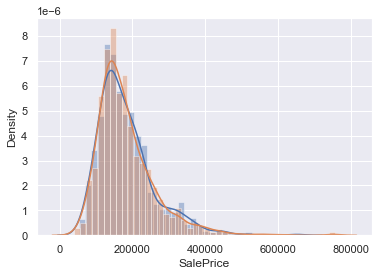

In [40]:
error = (y_train - pipe.predict(X_train_new)) ** 2
sns.distplot(pipe.predict(X_train_new))
sns.distplot(y_train)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

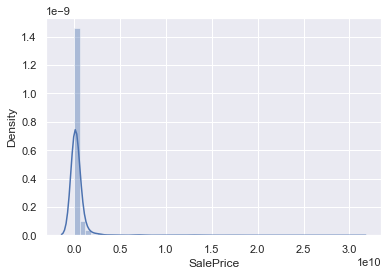

In [41]:
sns.distplot(error)

Как видно из гистограммы, есть примеры с очень большими остатками. Попробуем их выбросить из обучающей выборки. Например, выбросим примеры, остаток у которых больше 0.95-квантили.

In [42]:
# Выбросите из обучающей выборки примеры, остаток у которых больше 0.95-квантили и переобучите модели 

quan = np.quantile(error, 0.95)
print(quan)
X_mask = X_train_new[(y_train - pipe.predict(X_train_new)) ** 2 < quan]
print(X_train_new.shape, X_mask.shape)
y_mask = y_train[(y_train - pipe.predict(X_train_new)) ** 2 < quan]

1233408864.6273034
(1022, 288) (970, 288)


In [43]:
pipe = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge(alpha= 10))])
pipe.fit(X_mask, y_mask)
pipe.score(X_mask, y_mask)

0.972575491677473

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

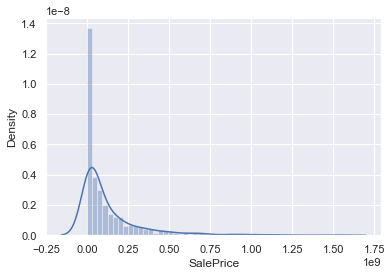

In [45]:
error = (y_mask - pipe.predict(X_mask)) ** 2
sns.distplot(error)

In [46]:
print(X_test.columns.difference(X_mask.columns))

Index([], dtype='object')


In [50]:
# Получите скор по нашей метрике (RMSE) ниже значения 30000
pred = pipe.predict(X_test)
rmse(y_test, pred)

25080.47883468433

In [51]:
lasso_pipe = Pipeline([('scaler', StandardScaler()), ('lasso', Lasso(alpha= 100))])
lasso_pipe.fit(X_mask, y_mask)
lasso_pipe.score(X_mask, y_mask)

0.9713942972932913

In [52]:
lasso_pred = lasso_pipe.predict(X_test)
rmse(y_test, lasso_pred)

24052.079826037778